# Gloria (no Ack)

In [25]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
%matplotlib inline

In [27]:
%autoreload

In [28]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
import pandas as pd

In [99]:
from flora_tools.flocklab.flocklab import FlockLab

logs = FlockLab.parse_serial_log("../../data/MeasureFlockLabGloria_serial.csv")

# lines to process: 23569
0,2000,3000,5000,7000,8000,9000,10000,12000,13000,14000,16000,17000,18000,20000,21000,23000,Parsing finished!


In [100]:
%autoreload

In [101]:
from flora_tools.flocklab.measure_gloria import MeasureGloriaExperiment, ITERATIONS
receptions = MeasureGloriaExperiment.reconstruct_receptions(logs, "../../data/MeasureFlockLabGloria_receptions.csv")

4533@1,4821@1,5121@1,2427@3,5328@3,5546@3,5758@3,12804@4,13118@4,13386@4,3174@8,3456@8,3754@8,14244@10,14510@10,14776@10,3864@13,4126@13,4380@13,2826@15,6862@15,7084@15,7310@15,13411@20,13637@20,13863@20,14093@20,11956@22,12186@22,12412@22,12640@22,8167@23,8391@23,8617@23,8839@23,6038@24,6294@24,6534@24,7476@25,7744@25,7990@25,8974@26,9208@26,9450@26,9680@26,1122@28,10650@28,10854@28,11058@28,11262@28,3074@32,11541@32,11797@32,9705@33,9937@33,10173@33,10407@33,

In [118]:
receptions = pd.read_csv("../../data/MeasureFlockLabGloria_receptions.csv")

In [119]:
%autoreload

In [120]:
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets

from flora_tools.radio_configuration import RadioConfiguration

from flora_tools.flocklab.flocklab import FLOCKLAB_TARGET_ID_LIST
from flora_tools.flocklab.measure_gloria import MeasureGloriaExperiment, POWER_LEVELS, POWERS, ITERATIONS
from flora_tools.lwb_slot import RADIO_MODULATIONS

#RADIO_MODULATIONS = [3, 5, 7, 9]
#POWERS = [10, 22]

rx_receptions = receptions[receptions.rx_slot >= 0]

POWERS = [10, 22]

NODE_OPTIONS = list(FLOCKLAB_TARGET_ID_LIST)
NODE_OPTIONS.append('all')

@interact(tx_node=NODE_OPTIONS, 
          modulation=(0, len(RADIO_MODULATIONS) - 1), 
          power_level=(0, len(POWERS) - 1), 
          hop_count=(0, 5))
def g(tx_node, modulation=0, power_level=0, hop_count=1):
    modulation = RADIO_MODULATIONS[modulation]
    
    config = RadioConfiguration(modulation)
    
    figure = plt.figure(figsize=[24,15])
    plt.suptitle("{}, {:d}dBm, {} hops".format(config.modulation_name, POWERS[power_level], hop_count), fontsize=20)
    
    MeasureGloriaExperiment.draw_links(rx_receptions, modulation, power_level, hop_count, tx_node=tx_node, iterations=3)


interactive(children=(Dropdown(description='tx_node', options=(1, 3, 4, 8, 10, 13, 15, 20, 22, 23, 24, 25, 26,…

# Gloria with ACK

In [126]:
from flora_tools.flocklab.flocklab import FlockLab

logs = FlockLab.parse_serial_log("../../data/MeasureFlockLabGloriaAck_serial.csv")


# lines to process: 26417
0,2000,3000,4000,7000,9000,10000,11000,12000,13000,14000,17000,18000,19000,21000,22000,23000,24000,25000,26000,Parsing finished!


In [127]:
from flora_tools.flocklab.measure_gloria import MeasureGloriaExperiment, ITERATIONS
receptions = MeasureGloriaExperiment.reconstruct_receptions(logs, "../../data/MeasureFlockLabGloriaAck_receptions.csv")


3624@1,3878@1,4164@1,2837@3,5821@3,6049@3,6281@3,6513@3,7155@4,13471@8,13757@8,14053@8,11885@10,12205@10,12523@10,440@13,8959@13,9259@13,9434@15,9688@15,9966@15,667@20,12835@20,13103@20,13349@20,1308@22,15316@22,15556@22,15814@22,1988@23,14448@23,14682@23,14936@23,5074@25,5404@25,3100@28,7920@28,8132@28,8370@28,8598@28,3574@32,10444@32,10742@32,11007@33,11250@33,11493@33,11747@33,

In [128]:
ack_receptions = pd.read_csv("../../data/MeasureFlockLabGloriaAck_receptions.csv")

In [129]:
%autoreload

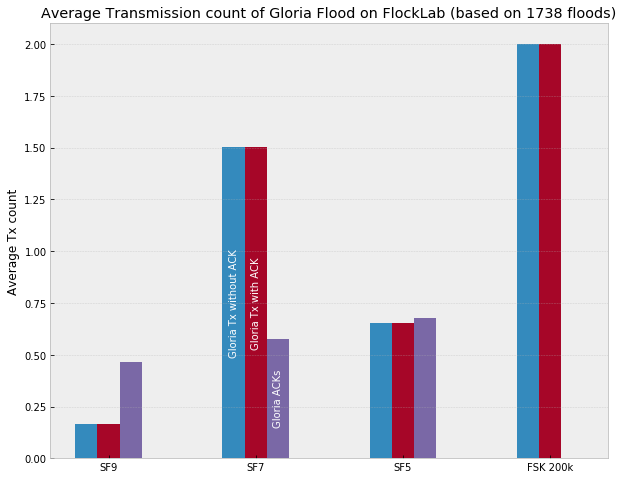

In [130]:
MeasureGloriaExperiment.analyze_tx_count(receptions, ack_receptions)
